# 事前準備

In [ ]:
%cd /content/drive/MyDrive/yolo_workspace/yolov6

/content/drive/MyDrive/yolo_workspace/yolov6


In [ ]:
# Download MT-YOLOv6 repository and install requirements
!git clone https://github.com/meituan/YOLOv6

Cloning into 'YOLOv6'...
remote: Enumerating objects: 1333, done.
remote: Counting objects: 100% (358/358), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 1333 (delta 299), reused 288 (delta 285), pack-reused 975
Receiving objects: 100% (1333/1333), 9.98 MiB | 10.17 MiB/s, done.
Resolving deltas: 100% (735/735), done.


In [ ]:
%cd YOLOv6
!curl -L "https://public.roboflow.com/ds/aH1YeHycST?key=jMnwvrWub4" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content/drive/MyDrive/yolo_workspace/yolov6/YOLOv6
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   897  100   897    0     0   3125      0 --:--:-- --:--:-- --:--:--  3125
100 12.7M  100 12.7M    0     0  14.5M      0 --:--:-- --:--:-- --:--:-- 65.4M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: images/
   creating: images/test/
 extracting: images/test/BloodImage_00038_jpg.rf.ffa23e4b5b55b523367f332af726eae8.jpg  
 extracting: images/test/BloodImage_00044_jpg.rf.e7760375eba4bc20c5746367e2311e18.jpg  
 extracting: images/test/BloodImage_00062_jpg.rf.1be1ca0ecdf783798fc10346baaa203e.jpg  
 extracting: images/test/BloodImage_00090_jpg.rf.cdbf8f6ed3b93fa902a0bc991132cb40.jpg  
 extracting: images/test/BloodImage_00099_jpg.rf.e3c42cd68359527494a53843479dff5c.jpg  
 extract

In [ ]:
%cat data.yaml

train: ./images/train
val: ./images/valid
test: ./images/test

nc: 3
names: ['Platelets', 'RBC', 'WBC']

# Train

In [ ]:
%cd /content/drive/MyDrive/yolo_workspace/yolov6/YOLOv6
!pip install -r requirements.txt

/content/drive/MyDrive/yolo_workspace/yolov6/YOLOv6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 28.6 MB/s 
     |████████████████████████████████| 13.1 MB 57.3 MB/s 
     |████████████████████████████████| 2.0 MB 59.0 MB/s 
     |████████████████████████████████| 235 kB 69.9 MB/s 
     |████████████████████████████████| 51 kB 9.7 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# run this cell to begin training
!python tools/train.py --batch 16 --conf configs/yolov6s.py --epochs 100 --img-size 416 --data data.yaml --device 0

Using 1 GPU for training... 
training args are: Namespace(batch_size=16, check_images=False, check_labels=False, conf_file='configs/yolov6s.py', data_path='data.yaml', device='0', dist_url='env://', epochs=100, eval_final_only=False, eval_interval=20, gpu_count=0, heavy_eval_range=50, img_size=416, local_rank=-1, name='exp', output_dir='./runs/train', rank=-1, resume=False, save_dir='runs/train/exp3', workers=8, world_size=1)

Train: Checking formats of images with 2 process(es): 
0 image(s) corrupted: 100% 765/765 [00:14<00:00, 52.38it/s] 
Train: Checking formats of labels with 2 process(es): 
765 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 765/765 [01:22<00:00,  9.23it/s]
Train: Final numbers of valid images: 765/ labels: 765. 
101.1s for dataset initialization.
Val: Checking formats of images with 2 process(es): 
0 image(s) corrupted: 100% 73/73 [00:08<00:00,  9.05it/s]
Val: Checking formats of labels with 2 process(es): 
73 label(s) found, 0 la

In [ ]:
# Run evaluation
!python tools/eval.py --data data.yaml --img-size 416 --weights runs/train/exp3/weights/best_ckpt.pt --device 0

Namespace(batch_size=32, conf_thres=0.001, data='data.yaml', device='0', half=False, img_size=416, iou_thres=0.65, name='exp', save_dir='runs/val/', task='val', weights='runs/train/exp3/weights/best_ckpt.pt')
Loading checkpoint from runs/train/exp3/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
Model Summary: Params: 17.19M, Gflops: 18.62
Val: Checking formats of labels with 2 process(es): 
73 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 73/73 [00:00<00:00, 676.44it/s]
Convert to COCO format
100% 73/73 [00:00<00:00, 33451.79it/s]
Convert to COCO format finished. Resutls saved in ./annotations/instances_valid.json
Val: F

In [ ]:
# infer on all images in our /test directory
!python tools/infer.py --yaml data.yaml --img-size 416 --weights runs/train/exp3/weights/best_ckpt.pt --source images/test/ --device 0

Namespace(agnostic_nms=False, classes=None, conf_thres=0.25, device='0', half=False, hide_conf=False, hide_labels=False, img_size=416, iou_thres=0.45, max_det=1000, name='exp', project='runs/inference', save_img=True, save_txt=False, source='images/test/', view_img=False, weights='runs/train/exp3/weights/best_ckpt.pt', yaml='data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp3/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
100% 36/36 [00:11<00:00,  3.12it/s]
Results saved to runs/inference/exp


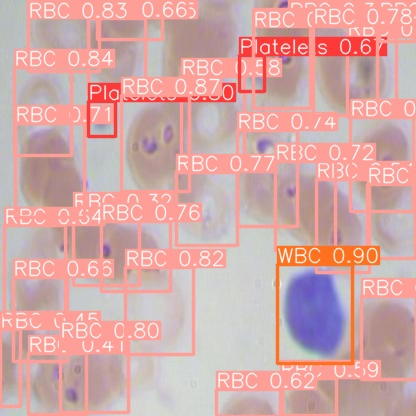

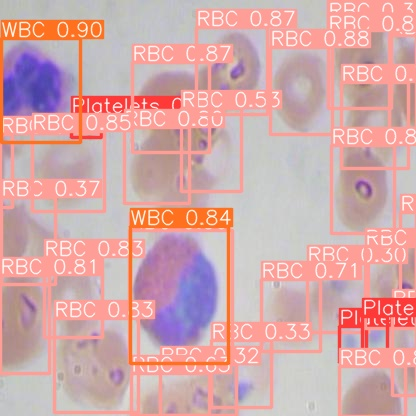

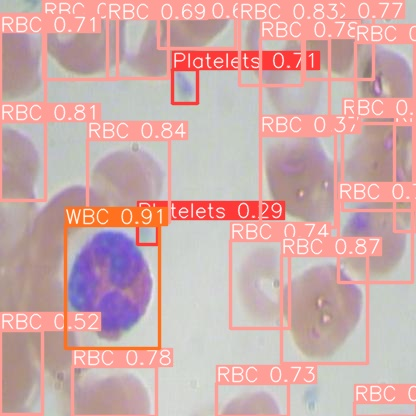

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
%cd /content/drive/MyDrive/yolo_workspace/yolov6/YOLOv6

/content/drive/MyDrive/yolo_workspace/yolov6/YOLOv6


In [ ]:
!python tools/eval.py --data data_test.yaml --img-size 416 --weights runs/train/exp3/weights/best_ckpt.pt --device 0 --iou-thres 0.5

Namespace(batch_size=32, conf_thres=0.001, data='data_test.yaml', device='0', half=False, img_size=416, iou_thres=0.5, name='exp', save_dir='runs/val/', task='val', weights='runs/train/exp3/weights/best_ckpt.pt')
Traceback (most recent call last):
  File "tools/eval.py", line 93, in <module>
    main(args)
  File "tools/eval.py", line 88, in main
    run(**vars(args))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "tools/eval.py", line 70, in run
    device = Evaler.reload_device(device, model, task)
  File "/content/drive/MyDrive/yolo_workspace/yolov6/YOLOv6/yolov6/core/evaler.py", line 242, in reload_device
    assert torch.cuda.is_available()
AssertionError
